In [89]:
#@title Authenticate user and mount drive
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
%%bigquery --project bikeable bike_injury_no_mv

SELECT OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, STREET, Lat, Long FROM `bikeable.crime.boston_crime` WHERE OFFENSE_CODE = 3004

In [0]:
#@title Install Latest Version of Plotly, for use in interactive graphics
!pip install plotly -q --upgrade

In [0]:
#@title Import Python Libraries & Some Other Setup
# Basic Python data science libraries
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

INJURY BICYCLE NO M/V INVOLVED


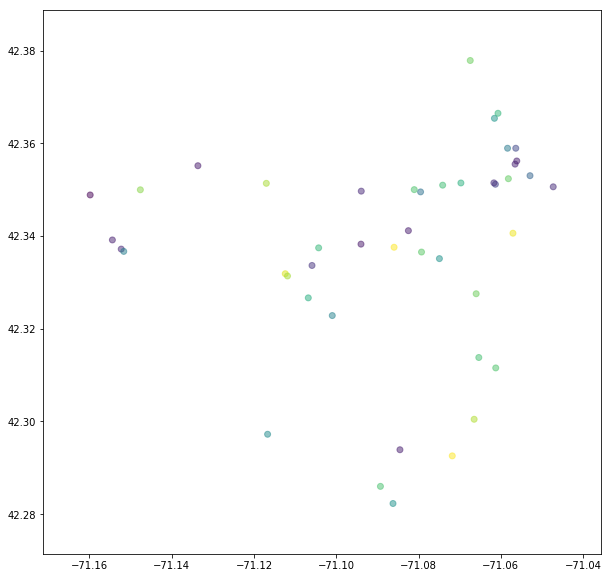

In [93]:
#@title Display bike accidents (no motor vehicles)
bike_injury_no_mv = bike_injury_no_mv.dropna()
print("INJURY BICYCLE NO M/V INVOLVED")


bi_loc = bike_injury_no_mv[['Lat','Long']]
bi_loc = bi_loc.loc[(bi_loc['Lat']>40) & (bi_loc['Long'] < -60)]
x = bi_loc['Long']
y = bi_loc['Lat']
colors = np.random.rand(len(x))
plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [0]:
%%bigquery --project bikeable mv_accident_bike_no_injury

SELECT OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, STREET, Lat, Long FROM `bikeable.crime.boston_crime` WHERE (OFFENSE_CODE = 3811)

M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY


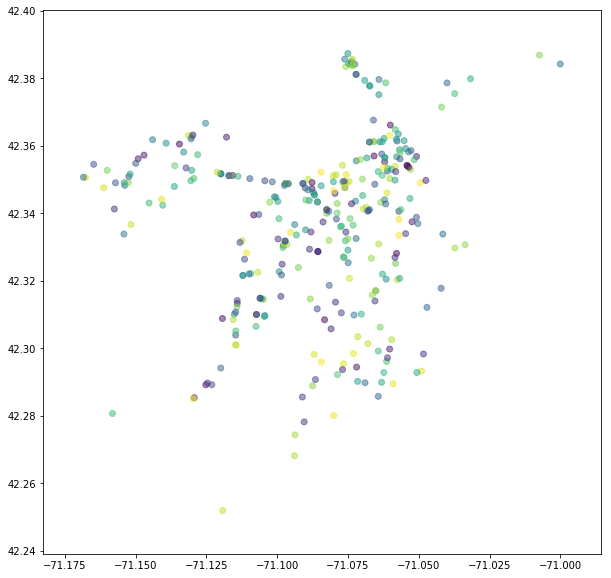

In [95]:
#@title Display bike and motor vehicle accidents with NO injuries
mv_accident_bike_no_injury = mv_accident_bike_no_injury.dropna()
print("M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY")


bmvni_loc = mv_accident_bike_no_injury[['Lat','Long']]
bmvni_loc = bmvni_loc.loc[(bmvni_loc['Lat']>40) & (bmvni_loc['Long'] < -60)]
x = bmvni_loc['Long']
y = bmvni_loc['Lat']
colors = np.random.rand(len(x))
plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [0]:
%%bigquery --project bikeable mv_accident_bike_yes_injury

SELECT OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, STREET, Lat, Long FROM `bikeable.crime.boston_crime` WHERE (OFFENSE_CODE = 3810)

BIKE AND MOTOR VEHICLE ACCIDENTS WITH INJURIES


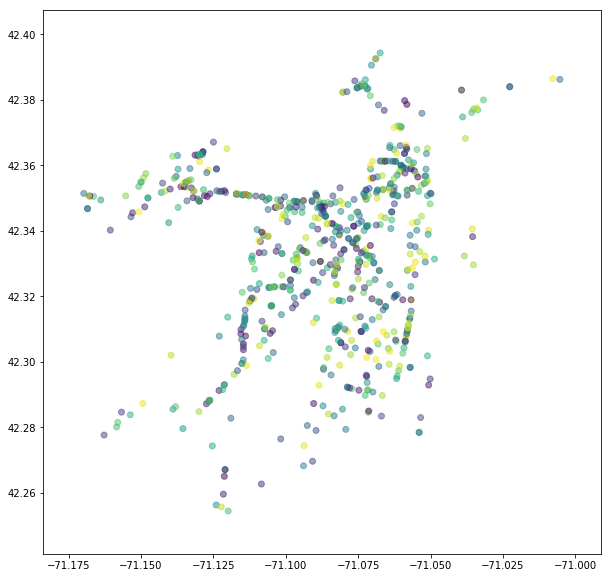

In [97]:
#@title Display bike and motor vehicle accidents with injuries
mv_accident_bike_yes_injury = mv_accident_bike_yes_injury.dropna()
print("BIKE AND MOTOR VEHICLE ACCIDENTS WITH INJURIES")


bmvi_loc = mv_accident_bike_yes_injury[['Lat','Long']]
bmvi_loc = bmvi_loc.loc[(bmvi_loc['Lat']>40) & (bmvi_loc['Long'] < -60)]
x = bmvi_loc['Long']
y = bmvi_loc['Lat']
colors = np.random.rand(len(x))
plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [0]:
%%bigquery --project bikeable larceny_theft

SELECT OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, STREET, Lat, Long FROM `bikeable.crime.boston_crime` WHERE (OFFENSE_CODE = 616) OR (OFFENSE_CODE = 626) OR (OFFENSE_CODE = 636)

LARCENY THEFT OF BICYCLE


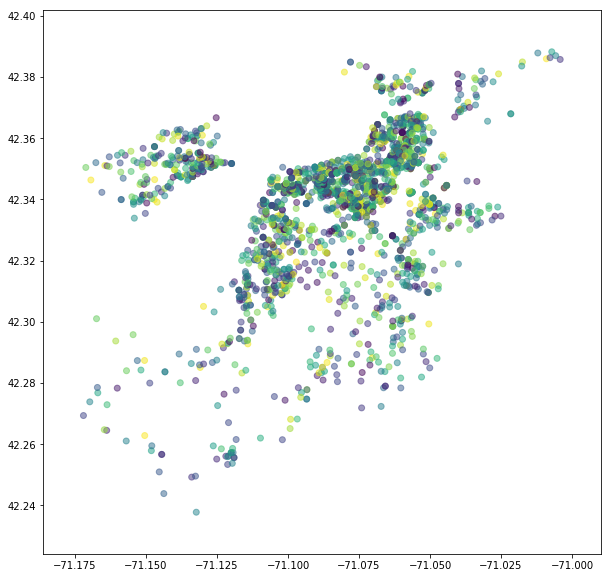

In [123]:
#@title Display bicycle thefts
print("LARCENY THEFT OF BICYCLE")
larceny_theft = larceny_theft.dropna()
bt_loc = larceny_theft[['Lat','Long']]
bt_loc = bt_loc.loc[(bt_loc['Lat']>40) & (bt_loc['Long'] < -60)]
x = bt_loc['Long']
y = bt_loc['Lat']
colors = np.random.rand(len(x))
plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [0]:
# Some useful packages
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf
import keras

In [0]:
# remove -1, -1 because they are null values


In [0]:
from sklearn.neighbors import NearestNeighbors


In [0]:
columns = ['Lat', 'Long']

In [0]:
data = mv_accident_bike_yes_injury[columns]

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 244 to 948
Data columns (total 2 columns):
Lat     689 non-null float64
Long    689 non-null float64
dtypes: float64(2)
memory usage: 16.1 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 244 to 948
Data columns (total 2 columns):
Lat     689 non-null float64
Long    689 non-null float64
dtypes: float64(2)
memory usage: 16.1 KB


In [119]:
# Plotting decision regions
x_min, x_max = data.iloc[:, 0].min() - 1, data.iloc[:, 0].max() + 1
y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
X = np.concatenate((np.ones((xx.shape[0]*xx.shape[1],1))
                 ,  np.c_[xx.ravel(), yy.ravel()]), axis = 1)
h = hypothesis(theta, X, 2)
h = h.reshape(xx.shape)
plt.contourf(xx, yy, h)
plt.scatter(data[:, 0], data[:, 1], c=y_train,
                              s=30, edgecolor='k')
plt.xlabel("Marks obtained in 1st Exam")
plt.ylabel("Marks obtained in 2nd Exam")


NameError: ignored

In [0]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(mv_accident_bike_yes_injury[columns])

In [122]:
nbrs

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [0]:
from sklearn.cluster import KMeans


In [0]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=5)
Kmean.fit(mv_accident_bike_yes_injury[columns])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
Kmean.cluster_centers_


array([[ 42.34615746, -71.11445254],
       [ -1.        ,  -1.        ],
       [ 42.31474309, -71.07420236],
       [ 42.29546199, -71.11771297],
       [ 42.3577443 , -71.06242103]])

In [0]:
centroids_accidents = Kmean.cluster_centers_

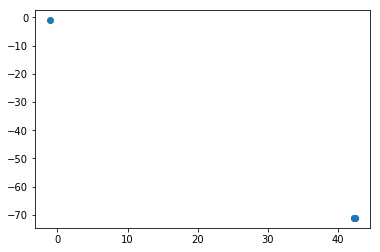

In [0]:
plt.scatter(centroids_accidents[:,0], centroids_accidents[:,1])


Centroids of Bicycle Accidents with Injuries


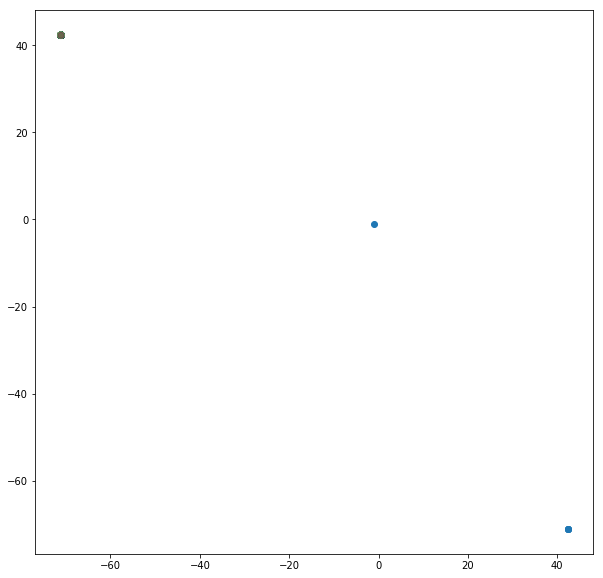

In [0]:
#@title Display Centroids of Bicycle Accidents with Injuries
print("Centroids of Bicycle Accidents with Injuries")
mv_accident_bike_yes_injury = mv_accident_bike_yes_injury.dropna()
bt_loc = mv_accident_bike_yes_injury[['Lat','Long']]
bt_loc = bt_loc.loc[(bt_loc['Lat']>40) & (bt_loc['Long'] < -60)]
x = bt_loc['Long']
y = bt_loc['Lat']
colors = np.random.rand(3)
colors = np.random.rand(len(x))
plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.scatter(centroids_accidents[:,0], centroids_accidents[:,1])

plt.show()

In [0]:
# LEAST dangerous

#bike_injury_no_mv -  bike accidents (no motor vehicles) = 1
# mv_accident_bike_yes_injury - bike and motor vehicle accidents with NO injuries = 2
# mv_accident_bike_no_injury - Display bike and motor vehicle accidents with no injuries = 3

# MOST dangerous



In [0]:
bike_injury_no_mv['rating'] = 1
mv_accident_bike_yes_injury['rating'] = 2
mv_accident_bike_no_injury['rating'] = 3

In [0]:
frames = [bike_injury_no_mv, mv_accident_bike_yes_injury, mv_accident_bike_no_injury]

fullData = pd.concat(frames)

In [0]:
columns = ['Lat', 'Long', 'rating']
fullData = fullData[columns]


In [0]:
#drop -1 and -1
fullData = fullData.drop(fullData[(fullData.Long == -1) & (fullData.Lat == -1)].index)

In [157]:
fullData.sample(5)

,Lat,Long,rating
629,42.295897,-71.072167,2
459,42.332838,-71.057004,2
838,42.303625,-71.114643,2
693,42.288149,-71.126307,2
799,42.346426,-71.106114,2


Automatically created module for IPython interactive environment


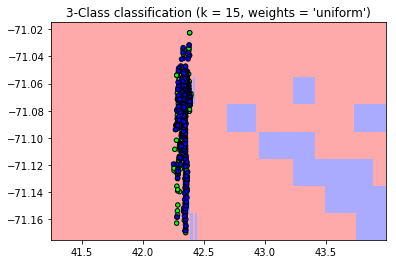

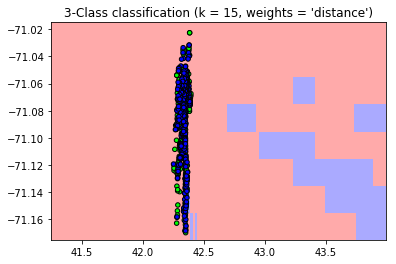

In [185]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = fullData[['Long', 'Lat']]
y = fullData['rating']

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = fullData.iloc[:, 0].min() - 1, fullData.iloc[:, 0].max() + 1
    y_min, y_max = fullData.iloc[:, 1].min() - 1, fullData.iloc[:, 1].max() + 1
    X_min = 42.2
    x_max = 44
    
    y_max = -71
    y_min = -71.175
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(fullData.iloc[:, 0], fullData.iloc[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# K- Means

In [0]:
# todo 

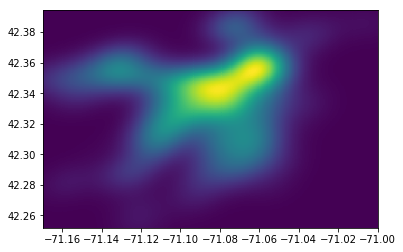

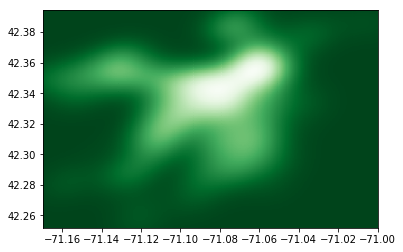

In [190]:
# Heat map
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = fullData['Long']
y = fullData['Lat']
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.show()


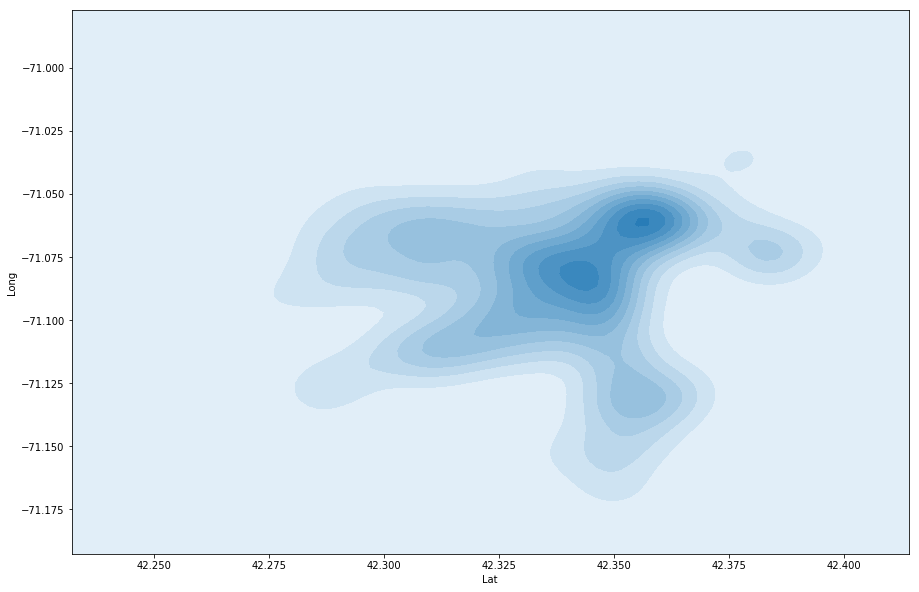

In [208]:
# Make marginal bigger:
plt.figure(figsize=(15,10))
ax = sns.kdeplot(fullData["Lat"], fullData["Long"], shade=True)

<Figure size 7200x7200 with 0 Axes>

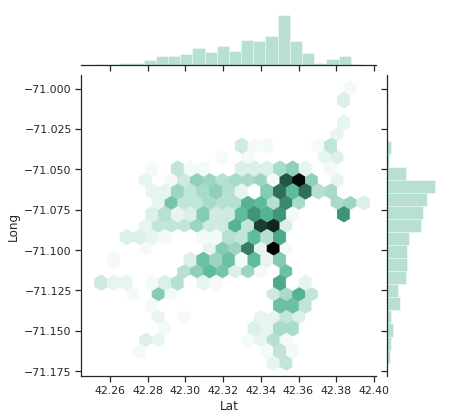

In [222]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

x = fullData["Lat"]
y = fullData["Long"]

#more hexagons 
sns.jointplot(x, y, kind="hex", color="#4CB391")

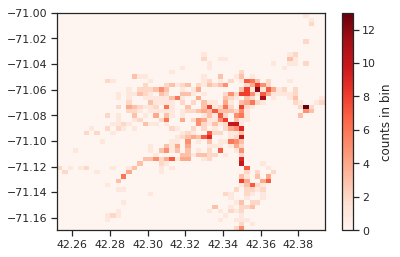

In [233]:
plt.hist2d(fullData["Lat"], fullData["Long"], bins=50, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [0]:
# Get the points
# > 8

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'Label'
  s)


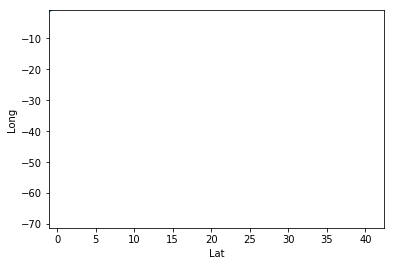

In [218]:
sns.kdeplot(mv_accident_bike_yes_injury['Lat'], 
            mv_accident_bike_yes_injury['Long'], 
            color='r', shade=True, Label='Yes injury', 
            cmap="Reds", shade_lowest=False) 
  
sns.kdeplot(mv_accident_bike_no_injury['Lat'],  
            mv_accident_bike_no_injury['Long'], color='b', 
            shade=True, Label='No Injury', 
            cmap="Blues", shade_lowest=False) 

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,rating
737,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2017-10-24 19:23:00+00:00,2017,10,Tuesday,19,HUNTINGTON AVE,42.342019,-71.085662,2
307,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2015-09-10 08:15:00+00:00,2015,9,Thursday,8,MAIN ST,42.376700,-71.066022,2
603,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2016-06-30 20:34:00+00:00,2016,6,Thursday,20,BAKER AVE,42.312826,-71.070148,2
936,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2017-05-02 16:49:00+00:00,2017,5,Tuesday,16,WALFORD WAY,42.378509,-71.058178,2
659,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2015-06-24 11:08:00+00:00,2015,6,Wednesday,11,HARVARD ST,42.295923,-71.084369,2


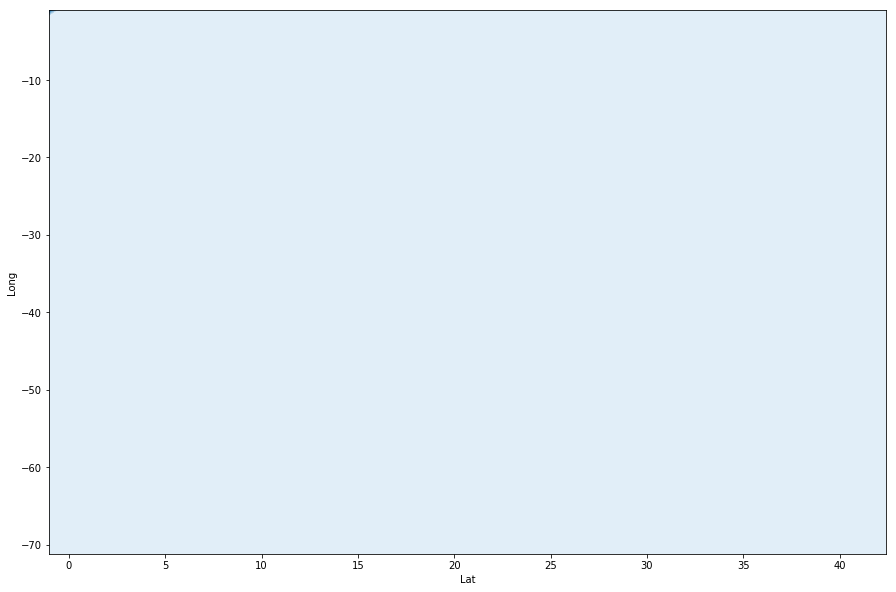

In [217]:
#plt.figure(figsize=(15,10))
#plt.xlim(44,45 )
#sns.kdeplot(mv_accident_bike_yes_injury["Lat"], mv_accident_bike_yes_injury["Long"], shade=True)

In [214]:
mv_accident_bike_yes_injury.head(5)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,rating
244,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2016-06-24 14:16:00+00:00,2016,6,Friday,14,MAIN,-1.000000,-1.000000,2
256,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2017-02-17 07:00:00+00:00,2017,2,Friday,7,COMMONWEALTH AVE,42.350638,-71.112659,2
257,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2016-08-11 08:50:00+00:00,2016,8,Thursday,8,COMMONWEALTH AVE,42.350638,-71.112659,2
258,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2016-01-09 15:11:00+00:00,2016,1,Saturday,15,COMMONWEALTH AVE,42.350638,-71.112659,2
261,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2017-06-21 08:10:00+00:00,2017,6,Wednesday,8,COMMONWEALTH AVE,42.350886,-71.114779,2


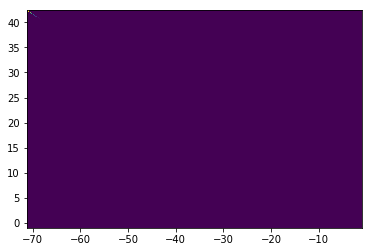

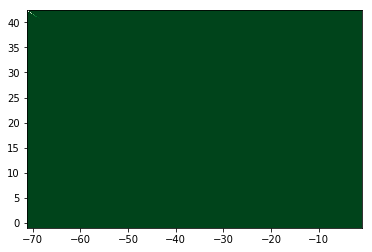

In [193]:

# create data
x = mv_accident_bike_yes_injury['Long']
y = mv_accident_bike_yes_injury['Lat']
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.show()
